## Project 2 Monte Carlo Simulation



### Import Dependencies

In [36]:
# Import libraries and dependencies
import os
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

In [37]:
# Import warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [38]:
# # Load .env enviroment variables
# from dotenv import load_dotenv
# load_dotenv()

In [39]:
# # Set yfinance API key and secret
# yfinance_api_key = os.getenv("YFINANCE_API_KEY")
# yfinance_secret_key = os.getenv("YFINANCE_SECRET_KEY")

# api = tradeapi.REST(
#     yfinance_api_key,
#     yfinance_secret_key,
#     api_version = "v2"
# )

In [40]:
# import yfinance "SPY"

spy = yf.Ticker("SPY")

# get all stock info
spy.info

# get historical market data
hist = spy.history(period="6mo")

# Display sample data
# df_ticker.head()
print(yf.Ticker('spy').info)

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.', 'maxAge': 86400, 'priceHint': 2, 'previousClose': 427.48, 'open': 426.62, 'dayLow': 424.46, 'dayHigh': 428.6, 'regularMarketPreviousClose': 427.48, 'regularMarketOpen': 426.62, 'regularMarketDayLow': 424.46, 'regularMarketDayHigh': 428.6, 'trailingPE': 21.525518, 'volume': 83482674, 'regularMarketVolume': 83482674, 'averageVolume': 75568982, 'averageVolume10days': 88872070, 'averageDailyVolume10Day': 88872070, 'bid': 0.0, 'ask': 0.0, 'bidSize': 800, 'askSize': 800, 'yield': 0.0145000005, 'totalAssets': 412799303680, 'fiftyTwoWeekLow': 348.11, 'fiftyTwoWeekHigh': 459.44, 'fiftyDayAverage': 444.326, 'twoHundredDayAverage': 418.93274, 'trailingAnnualDividendRate': 5.662, 'trailingAnnualDividendYield': 0.

In [89]:
# import yfinance "AGG"

agg = yf.Ticker("AGG")

# get all stock info
agg.info

# get historical market data
hist = agg.history(period="6mo")

# Display sample data
# df_ticker.head()
print(yf.Ticker('AGG').info)


{'phone': '1-800-474-2737', 'longBusinessSummary': 'The index measures the performance of the total U.S. investment-grade bond market. The fund will invest at least 80% of its assets in the component securities of the underlying index and TBAs that have economic characteristics that are substantially identical to the economic characteristics of the component securities of the underlying index, and the fund will invest at least 90% of its assets in fixed income securities of the types included in the underlying index that the advisor believes will help the fund track the underlying index.', 'maxAge': 86400, 'priceHint': 2, 'previousClose': 93.7827, 'open': 93.43, 'dayLow': 93.1, 'dayHigh': 93.51, 'regularMarketPreviousClose': 93.7827, 'regularMarketOpen': 93.43, 'regularMarketDayLow': 93.1, 'regularMarketDayHigh': 93.51, 'trailingPE': 118.78826, 'volume': 8866402, 'regularMarketVolume': 8866402, 'averageVolume': 7893538, 'averageVolume10days': 9741230, 'averageDailyVolume10Day': 9741230

In [ ]:
# # Set file path drawing data
# # S&P 500 (^GSPC)
# gspc_df= https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch

# # iShares U.S. Treasury Bond ETF (GOVT)
# govt_df= https://finance.yahoo.com/quote/GOVT?p=GOVT&.tsrc=fin-srch

### Get Past 6 months worth of SP500 and GOVT Price Data via Y Finance

In [ ]:
# # Set the ticker
# ticker = "SPY"

# # Set timeframe to "1Day"
# timeframe = "15Min"

# # Set start and end datetimes of 6 months from Today
# start_date = pd.Timestamp("2023-07-04", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-10-02", tz="America/New_York").isoformat()

# # Get 1 year's worth of historical data for AAPL
# ticker_data = api.get_bars(
#     ticker,
#     timeframe,
#     start=start_date,
#     end=end_date
# ).df

# ticker_data.head()

In [90]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Set timeframe to "15Min"
timeframe = "15Min"

# Set start and end datetimes between now and 6 month back.
# start_date = pd.Timestamp("2023-07-11", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()



# Get 6 month's worth of historical price data for SP500 and GOVT
SPY = yf.download("SPY", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# # Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [91]:
AGG= yf.download("AGG", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [92]:
# # Reorganize the DataFrame
# ticker_data = pd.concat([ticker_data], axis=1, keys=["SPY, AGG"])

# # Display sample data
# ticker_data.head()


# Reorganize the DataFrame
# Separate ticker data
# SPY = df_ticker[df_ticker["symbol"]=="SPY"]

# GOVT = df_ticker[df_ticker["symbol"]=="GOVT"]

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.info

<bound method DataFrame.info of                    SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-04-03  408.850006  411.369995  408.440002  410.950012  407.990021   
2023-04-04  411.619995  411.920013  407.239990  408.670013  405.726471   
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242706   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659668   
...                ...         ...         ...         ...         ...   
2023-09-26  429.089996  429.820007  425.019989  425.880005  425.880005   
2023-09-27  427.089996  427.670013  422.290009  426.049988  426.049988   
2023-09-28  425.480011  430.250000  424.869995  428.519989  428.519989   
2023-09-29  431.670013  431.850006  425.910004  427.480011  427.480011   
2023-1

<Axes: xlabel='Date'>

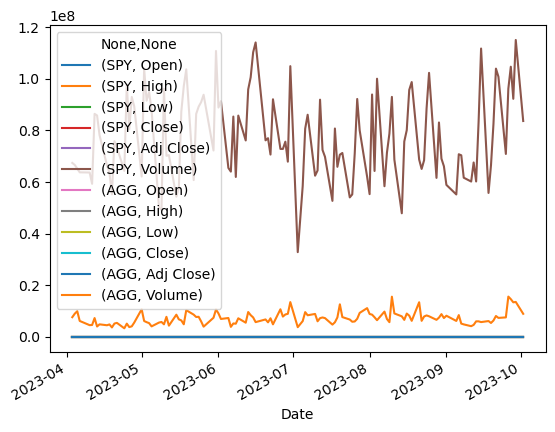

In [45]:
# Plot daily returns of all portfolios
display(df_ticker.plot())

In [ ]:
# # Reorganize the DataFrame
# # Separate ticker data
# spy = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# govt = df_ticker[df_ticker['symbol']=='GOVT'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
# df_ticker = pd.concat([spy, govt], axis=1, keys=["SPY", "GOVT"])

# # Display sample data
# # display(df_ticker.head()
# # display(df_ticker.tail()
# print(df_ticker)


### The MCForecastTools Library at a Glance

In [93]:
#Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Run 6 months portfolio growth using Monte Carlo simulation


Build (5) portfolios, corresponding to different benchmark risk/reward levels


Conservative 100/0% (Bonds/Stocks) ("SPY"SP500 Index/"AGG" BondETF)
Moderately Conservative* 60/40%
Moderate 40/60%
Moderately Aggressive  20/80%
Aggressive 0/100%


In [95]:
import numpy as np

# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
MC_six_months = MCSimulation(portfolio_data = 
    df_ticker,
    # portfolio_data = pd.DataFrame,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252
)
# portfolio_data : pandas.DataFrame
#     portfolio dataframe

# # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
# MC_six_months = MCSimulation(
#     portfolio_data = df_stock_data,
#     weights = [.40, .60],
#     num_simulation = 500,
#     num_trading_days = 252*30


# # Set number of simulations
# num_sims = 500

# # Configure a Monte Carlo simulation to forecast one year daily returns
# MC_six_months = MCSimulation(
#     portfolio_data = df_ticker,
#     num_simulation = num_sims,
#     num_trading_days = 252
# )

KeyError: 'close'

In [51]:
# # Printing the simulation input data
# MC_six_months.head()

In [52]:
# # Set number of simulations
# num_sims = 500

# # # Configure a Monte Carlo simulation to forecast one year daily returns
# MC_SPY = MCSimulation(
#     portfolio_data = df_ticker,
#     num_simulation = num_sims,
#     num_trading_days = 252
# )

KeyError: 'close'

In [81]:
# Set number of simulations
num_sims = 500

# # Configure a Monte Carlo simulation to forecast one year daily returns
MC_AGG = MCSimulation(
    portfolio_data = ticker_data ==["AGG"],
    num_simulation = num_sims,
    num_trading_days = 252
)

NameError: name 'ticker_data' is not defined

In [82]:
# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
MC_sixmonths = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 126 #6 months of trading days
)



KeyError: 'close'

In [83]:
# Printing the simulation input data
MC_sixmonths.portfolio_data.head()

NameError: name 'MC_sixmonths' is not defined

In [84]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_sixmonths.calc_cumulative_return()

NameError: name 'MC_sixmonths' is not defined

In [85]:
# Plot simulation outcomes
line_plot = MC_sixmonths.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sixmonths_sim_plot.png", bbox_inches="tight")

NameError: name 'MC_sixmonths' is not defined

In [86]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sixmonths.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_sixmonths_dist_plot.png',bbox_inches='tight')

NameError: name 'MC_sixmonths' is not defined

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sixmonths.summarize_cumulative_return()

# Print summary statistics
print(tbl)

NameError: name 'MC_sixmonths' is not defined

In [ ]:
# # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in SP500 and AGG
# ci_lower = round(tbl[8]*10000,2)
# ci_upper = round(tbl[9]*10000,2)

# # Print results
# print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
#       f" over the next 5 years will end within in the range of"
#       f" ${ci_lower} and ${ci_upper}")